# Transzformációk

## Transzformációk síkon

In [2]:
%matplotlib inline

# %% Imports
import sys
import numpy as np
from scipy.spatial.transform import Rotation
import matplotlib.pyplot as plt

In [3]:
# External imports
url = f"https://raw.githubusercontent.com/zkoppanyi/uni/main/utils/viz/viz.py"
!wget --no-cache --backups=1 {url}
from viz import plot_fustrum, plot_crs, set_3d_axes_equal

--2023-05-22 15:36:21--  https://raw.githubusercontent.com/zkoppanyi/uni/main/utils/viz/viz.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2234 (2,2K) [text/plain]
Failed to rename viz.py to viz.py.1: (2) No such file or directory
Saving to: ‘viz.py’

viz.py              100%[===================>]   2,18K  --.-KB/s    in 0s      

2023-05-22 15:36:21 (29,8 MB/s) - ‘viz.py’ saved [2234/2234]



In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
p = np.array([[1, 1], [2, 1], [2, 2], [1, 2], [1, 1]])

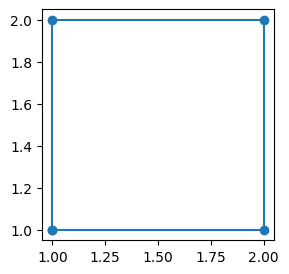

In [6]:
plt.figure(figsize=(3, 3))
plt.scatter(p[:, 0], p[:, 1])
plt.plot(p[:, 0], p[:, 1])

In [8]:
alpha = np.deg2rad(22.5)
print(alpha)

from math import pi
alpha = 22.5 / 180 * pi
print(alpha)

0.39269908169872414
0.39269908169872414


In [ ]:
from math import sin, cos
R = np.array([[cos(alpha), -sin(alpha)], [sin(alpha), cos(alpha)]])
print(R)

[[ 0.92387953 -0.38268343]
 [ 0.38268343  0.92387953]]


In [ ]:
p1 = p[1, :]
print(p1)
p1t = R @ p1
print(p1t)

[2 1]
[1.46507563 1.6892464 ]


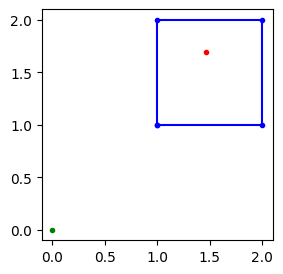

In [ ]:
plt.figure(figsize=(3,3))
plt.plot(p[:, 0], p[:, 1], 'b.-')
plt.plot(p1t[0], p1t[1], 'r.')
plt.plot(0, 0, 'g.')
plt.gca().set_aspect('equal')

In [ ]:
# R @ p
print(R.shape) # 2 x 2
print(p.shape) # 5 x 2

(2, 2)
(5, 2)


In [ ]:
pt = (R @ p.T).T
print(pt.shape)

(5, 2)


In [ ]:
pt2 = p @ R.T
print(pt2.shape)
print(np.linalg.norm(pt-pt2))

(5, 2)
0.0


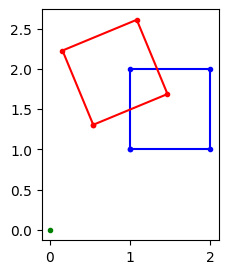

In [ ]:
plt.figure(figsize=(3,3))
plt.plot(p[:, 0], p[:, 1], 'b.-')
plt.plot(pt[:, 0], pt[:, 1], 'r.-') # <-- változás itt
plt.plot(0, 0, 'g.')
plt.gca().set_aspect('equal')

In [ ]:
t = np.array([-0.2, -0.5])
ptt = (R @ p.T).T + t

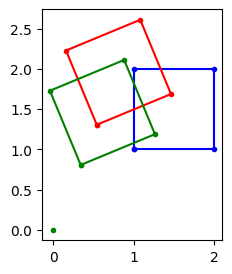

In [ ]:
plt.figure(figsize=(3,3))
plt.plot(p[:, 0], p[:, 1], 'b.-')
plt.plot(pt[:, 0], pt[:, 1], 'r.-') 
plt.plot(ptt[:, 0], ptt[:, 1], 'g.-') # <-- változás
plt.plot(0, 0, 'g.')
plt.gca().set_aspect('equal')

In [ ]:
from scipy.spatial.transform import Rotation
R3d_ext = Rotation.from_euler('xyz', [10.0, 25.0, -6.0], degrees=True).as_matrix()
print(R3d_ext)
R3d_int = Rotation.from_euler('XYZ', [10.0, 25.0, -6.0], degrees=True).as_matrix()
print(np.linalg.norm(R3d_int-R3d_ext))

[[ 0.90134294  0.17592531  0.39576659]
 [-0.09473496  0.97174185 -0.21620143]
 [-0.42261826  0.1573787   0.89253894]]
0.12684056391638296


## Euler szögek

Kísérleti szögek teszteléshez:

In [ ]:
euler_deg = [45, 15, -25]

In [ ]:
yaw = euler_deg[0] / 180.0 * np.pi
pitch = euler_deg[1] / 180.0 * np.pi
roll = euler_deg[2] / 180.0 * np.pi

R_x = np.array([[1, 0, 0], [0, np.cos(yaw), -np.sin(yaw)], [0, np.sin(yaw), np.cos(yaw)]])
R_y = np.array([[np.cos(pitch), 0, np.sin(pitch)], [0, 1, 0], [-np.sin(pitch), 0, np.cos(pitch)]])
R_z = np.array([[np.cos(roll), -np.sin(roll), 0], [np.sin(roll), np.cos(roll), 0], [0, 0, 1]])

R = R_x @ R_y @ R_z
print(R)

[[ 0.8754261   0.40821789  0.25881905]
 [-0.1329704   0.71820089 -0.6830127 ]
 [-0.46470208  0.56351187  0.6830127 ]]


Konverzió Euler szögekről forgatási mátrixra:

In [ ]:
R = Rotation.from_euler('xyz', euler_deg, degrees=True)
print(R.as_matrix())

[[ 0.8754261   0.46470208 -0.1329704 ]
 [-0.40821789  0.56351187 -0.71820089]
 [-0.25881905  0.6830127   0.6830127 ]]


In [ ]:
R = R_z @ R_y @ R_x
print(R)

[[ 0.8754261   0.46470208 -0.1329704 ]
 [-0.40821789  0.56351187 -0.71820089]
 [-0.25881905  0.6830127   0.6830127 ]]


## Belső és külső forgatások

A következő függvény csinál nekünk grafikát, amiről értelmezni fogjuk a forgatásokat:

In [ ]:
def plot_rotation(x, y, z, intrinsic=True):
    plt.figure(figsize=(9,7))
    ax = plt.axes(projection='3d')
    if intrinsic:
        R = Rotation.from_euler('XYZ', [x, y, z], degrees=True)
    else:
        R = Rotation.from_euler('xyz', [x, y, z], degrees=True)
    plot_fustrum(ax, [0, 0, 0], R.as_matrix(), img_limits=[1, 0.75], f=2.0, scale=1.0, c='k')
    plot_crs(ax, np.eye(3), X=[-2, -2, 0])
    crs = R.as_matrix()
    plot_crs(ax, crs)
    set_3d_axes_equal(ax)

A grafika így nézz ki:
 - pirossal az X tengelyt,
 - zölddel az Y tengelyt, és
 - kékkel a Z tengelyt láthatjuk.

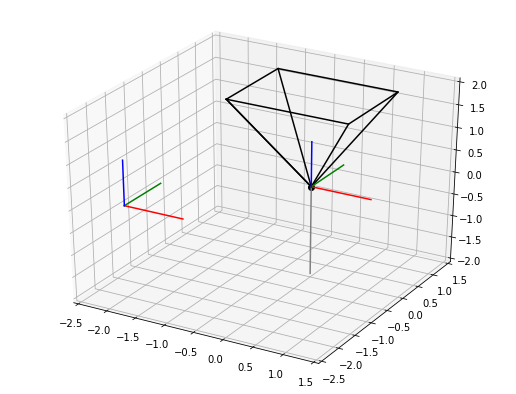

In [ ]:
plot_rotation(0, 0, 0)

Forgatás az X tengely körül (piros tengely):

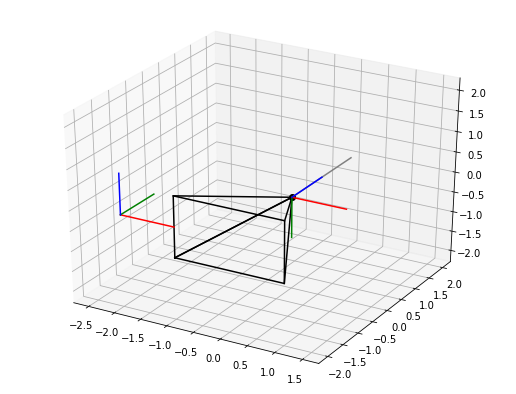

In [ ]:
plot_rotation(90, 0, 0)

Forgatás az Y tengely körül az elforgatott koordináta rendszerben. Vegyük észre ez egy forgatás az X világbeli koordinátarendszerben.

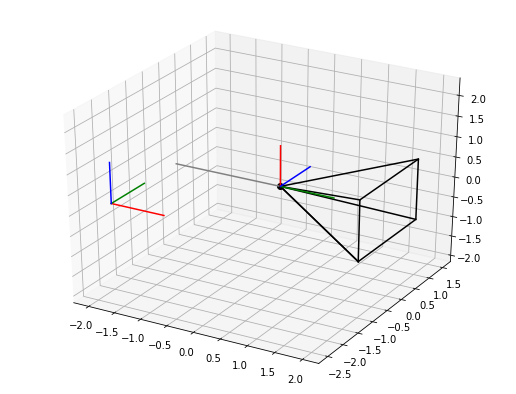

In [ ]:
plot_rotation(90, 90, 0)

Forgatás az Z tengely körül az elforgatott koordináta rendszerben.
Ez egy forgatás az X világbeli koordinátarendszerben.

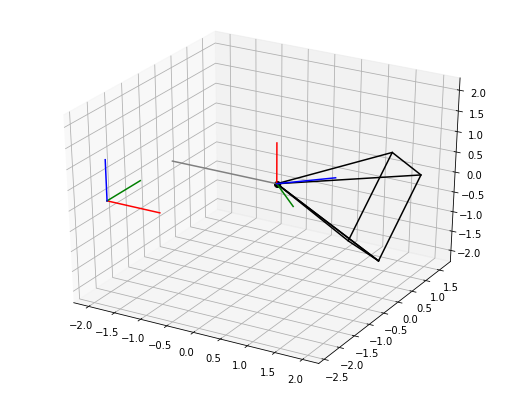

In [ ]:
plot_rotation(90, 90, 45)

Magyarázat:

12 kombinációja van x, y, z tengelyek körüli forgatásnak:
- Mechatronikában használatos: z-x-z, x-y-x, y-z-y, z-y-z, x-z-x, y-x-y
- Navgiációban, fotogrammetriában használatos: x-y-z, y-z-x, z-x-y, x-z-y, z-y-x, y-x-z

*További információ*: https://en.wikipedia.org/wiki/Euler_angles#Definition_by_intrinsic_rotations



Oké, most nézzük meg ugyanezeket a forgatások külső forgatásoként.

Első forgatás az X tengely körül ugyanúgy nézz ki.

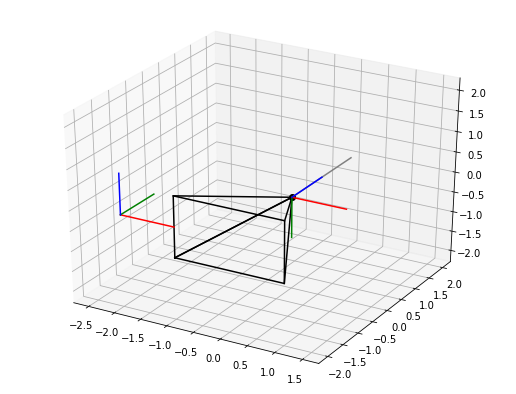

In [ ]:
plot_rotation(90, 0, 0, intrinsic=False)

Vegyük észre, hogy a második forgatás viszont a világbeli Y tengely körül történik most.

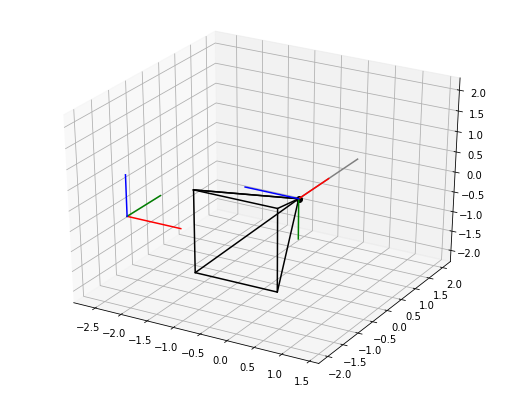

In [ ]:
plot_rotation(90, 90, 0, intrinsic=False)

Ugyanígy a harmadik is.

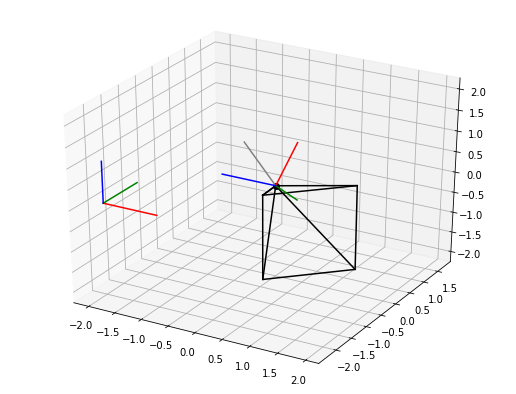

In [ ]:
plot_rotation(90, 90, 45, intrinsic=False)

Tehát van 12 forgatás kombinációnk belső, illetve 12 forgatási kombinációnk külső forgatásokra. Ez összesen 24 különböző módja a forgatások definiálásának. Azonban ezek a forgatások nyilvánvalóan átfednek. Ennek módját a következő lemma adja meg.

***Lemma***: *Egy Euler szögekkel adott belső forgatások ugyanazt a forgatást írják le, mint az ugyanazokkal a szögekkel megadott külső forgatások fordított sorrendje.*

Ezt az ekvivalenciát deomnstrálja a következő kód.

In [ ]:
# Test angle
rpy = euler_deg

# Rotation matrix from extrinsic rotations 
R_int = Rotation.from_euler('xyz', rpy, degrees=True) # extrinsic

# Reverse the order of the input Euler angles
ypr = [euler_deg[2], euler_deg[1], euler_deg[0]]

# Rotation matrix from intrinsic rotations of the reversed angle
R_ext = Rotation.from_euler('ZYX', ypr, degrees=True) # intrinsic

# Check whether the two are the same. 
chk = np.linalg.norm(R_int.as_matrix() - R_ext.as_matrix())
print(f"Difference of the two matrices: {chk}") # has to be small...

Difference of the two matrices: 2.9893669801409083e-16
